In [1]:
import pandas as pd
from sklearn.metrics import classification_report

In [2]:
data = pd.read_excel('havells-hairdryer-reviews-final.xlsx')
data = data.dropna(axis=0)
data = data.reset_index()
data = data.drop('index',axis=1)
data

,product,profile_name,title,rating,body
0,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,abrar lampard,looks good doesn't work good. Not good at all.,3,this is a terrible product. Spoilt in less tha...
1,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,FASAL A.,Recommended,4,There are three types of control of air. First...
2,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Hrishika Anand,Impressive! ❤️,5,"A good budget, handy and supercool product.Imp..."
3,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,S D.,Stopped working after single use!,1,We were shocked to see a product from company ...
4,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Dhilip Jayakumar,Got too much heated and produce smoke with bur...,1,On the first test itself with in 2 min the pro...
...,...,...,...,...,...
3075,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Anupama,Good product,5,It is very useful
3076,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Sarjekul Hoque,Good,5,Very nice
3077,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Devendra,Don’t purchase,1,Fan doesn’t work worst product
3078,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Amrita,satisfied,4,good product... user friendly


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product       3080 non-null   object
 1   profile_name  3080 non-null   object
 2   title         3080 non-null   object
 3   rating        3080 non-null   int64 
 4   body          3080 non-null   object
dtypes: int64(1), object(4)
memory usage: 120.4+ KB


In [4]:
review_title = pd.DataFrame(data.iloc[:,2])
rev_titles=[title.strip() for title in review_title.title]
rev_titles

["looks good doesn't work good. Not good at all.",
 'Recommended',
 'Impressive! ❤️',
 'Stopped working after single use!',
 'Got too much heated and produce smoke with burnt smell',
 'Satisfied customer',
 'Stop working',
 'Don’t buy ! Stopped working',
 'WORST EVER HAIR DRYER, STOPPED WORKING AFTER ONE USE',
 'Handy Havell’s',
 'Crappy Hairdryer',
 "Aswm product.. Just love it's",
 'had to substitute my old dryer',
 'Long lasting premium product',
 'Bad product and no customer service',
 'Compact and Powerful !!',
 'AS EASY AS IT GETS',
 'Value for money',
 'Not worth the price',
 'Good built quality.',
 'Worst product ever, do not see 5 star ratings and buy!',
 'Best blow dryer under ₹1k',
 'Meets expectations. Also check IONIC type before choosing this',
 'Burning smell withing 3 days',
 'Happy customer 😀',
 'Best hair dryer',
 'Good product on a budget',
 'Worst product',
 'Awesome product with reasonable money to buy',
 "Looks Good but Doesn't Work.",
 'Good one',
 'Looks very ni

In [5]:
review_body = pd.DataFrame(data.iloc[:,4])
rev_bodys=[body.strip() for body in review_body.body]
rev_bodys

['this is a terrible product. Spoilt in less than 5 days of use. The fan stopped working. The coil inside turns red like fire and its dangerous. Dont buy it. Its a scam product.',
 'There are three types of control of air. First switch for blowing normal fan mode. Though it’s fan mode when you use it very close to the mouth of air dryer it gives a little hot air. While it blows a little far it gives normal air. Second and third switch to increase the hotness of air. The neck of air blower can fold it on the same direction of its handle so it’s easy to carry while traveling. Good for daily use and value for money.',
 'A good budget, handy and supercool product.Impressive performance.Go for it. 💯',
 "We were shocked to see a product from company like Havel's stopped working in single use.My wife wasn't using it continually. Even due to prejudice we didn't inbox it for 7 days until we thought all the corona viruses were dead 😁But may be it had the virus and the device died in checking !!!

### Vader Sentiment Model


In [6]:
!pip install vaderSentiment

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [8]:
analyzer = SentimentIntensityAnalyzer()
scores = []

In [9]:
for rev_body in rev_bodys:
    score = analyzer.polarity_scores(rev_body)
    scores.append(score)


In [10]:
dfscore = pd.DataFrame(scores)
dfscore.shape

(3080, 4)

In [11]:
dfscore

,neg,neu,pos,compound
0,0.309,0.587,0.104,-0.8555
1,0.000,0.840,0.160,0.9243
2,0.000,0.791,0.209,0.4404
3,0.110,0.723,0.167,0.8679
4,0.100,0.821,0.079,0.1155
...,...,...,...,...
3075,0.000,0.484,0.516,0.4927
3076,0.000,0.244,0.756,0.4754
3077,0.436,0.319,0.245,-0.4215
3078,0.000,0.247,0.753,0.7269


In [12]:
dfscore['sentiment'] = pd.cut(dfscore['compound'], bins=(-1,-0.05,0.05,1), labels=['negative','neutral','positive'])

In [13]:
dfscore

,neg,neu,pos,compound,sentiment
0,0.309,0.587,0.104,-0.8555,negative
1,0.000,0.840,0.160,0.9243,positive
2,0.000,0.791,0.209,0.4404,positive
3,0.110,0.723,0.167,0.8679,positive
4,0.100,0.821,0.079,0.1155,positive
...,...,...,...,...,...
3075,0.000,0.484,0.516,0.4927,positive
3076,0.000,0.244,0.756,0.4754,positive
3077,0.436,0.319,0.245,-0.4215,negative
3078,0.000,0.247,0.753,0.7269,positive


In [14]:
data = data.join(dfscore['sentiment'])


In [15]:
data.head(20)

,product,profile_name,title,rating,body,sentiment
0,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,abrar lampard,looks good doesn't work good. Not good at all.,3,this is a terrible product. Spoilt in less tha...,negative
1,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,FASAL A.,Recommended,4,There are three types of control of air. First...,positive
2,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Hrishika Anand,Impressive! ❤️,5,"A good budget, handy and supercool product.Imp...",positive
3,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,S D.,Stopped working after single use!,1,We were shocked to see a product from company ...,positive
4,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Dhilip Jayakumar,Got too much heated and produce smoke with bur...,1,On the first test itself with in 2 min the pro...,positive
5,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,YuvrajNandini,Satisfied customer,5,The media could not be loaded.\n ...,positive
6,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Amazon Customer,Stop working,3,My dryer has been stop working from yesterday....,negative
7,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,shivsagar,Don’t buy ! Stopped working,1,Very bad stopped working in third use,negative
8,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,usha v,"WORST EVER HAIR DRYER, STOPPED WORKING AFTER O...",1,I read a lot of good reviews in Amazon and dec...,positive
9,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Barun Ghosh,Handy Havell’s,4,"A simple and effective hair dryer, very handy ...",positive


In [17]:
data['rat_sent'] = pd.cut(data['rating'],bins=(0,2,3,5), labels = ['negative','neutral','positive'])
data

,product,profile_name,title,rating,body,sentiment,rat_sent
0,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,abrar lampard,looks good doesn't work good. Not good at all.,3,this is a terrible product. Spoilt in less tha...,negative,neutral
1,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,FASAL A.,Recommended,4,There are three types of control of air. First...,positive,positive
2,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Hrishika Anand,Impressive! ❤️,5,"A good budget, handy and supercool product.Imp...",positive,positive
3,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,S D.,Stopped working after single use!,1,We were shocked to see a product from company ...,positive,negative
4,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Dhilip Jayakumar,Got too much heated and produce smoke with bur...,1,On the first test itself with in 2 min the pro...,positive,negative
...,...,...,...,...,...,...,...
3075,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Anupama,Good product,5,It is very useful,positive,positive
3076,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Sarjekul Hoque,Good,5,Very nice,positive,positive
3077,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Devendra,Don’t purchase,1,Fan doesn’t work worst product,negative,negative
3078,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Amrita,satisfied,4,good product... user friendly,positive,positive


In [18]:
act = data.iloc[:,6]
prd = data.iloc[:,5]

In [19]:
print(classification_report(act, prd))

              precision    recall  f1-score   support

    negative       0.65      0.53      0.58       405
     neutral       0.09      0.16      0.11       183
    positive       0.91      0.89      0.90      2492

    accuracy                           0.80      3080
   macro avg       0.55      0.52      0.53      3080
weighted avg       0.83      0.80      0.81      3080



<AxesSubplot:ylabel='sentiment'>

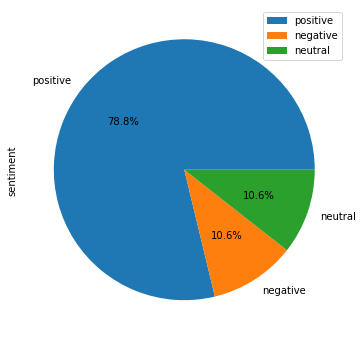

In [20]:
data['sentiment'].value_counts().plot(kind='pie',figsize=(6,6),autopct='%1.1f%%',legend=True)

In [21]:
data['sentiment'].value_counts()

positive    2426
negative     328
neutral      326
Name: sentiment, dtype: int64

### TextBlob Sentiment Model

In [22]:
data1 = data
data1 = data.drop('sentiment',axis=1)
data1

,product,profile_name,title,rating,body,rat_sent
0,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,abrar lampard,looks good doesn't work good. Not good at all.,3,this is a terrible product. Spoilt in less tha...,neutral
1,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,FASAL A.,Recommended,4,There are three types of control of air. First...,positive
2,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Hrishika Anand,Impressive! ❤️,5,"A good budget, handy and supercool product.Imp...",positive
3,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,S D.,Stopped working after single use!,1,We were shocked to see a product from company ...,negative
4,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Dhilip Jayakumar,Got too much heated and produce smoke with bur...,1,On the first test itself with in 2 min the pro...,negative
...,...,...,...,...,...,...
3075,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Anupama,Good product,5,It is very useful,positive
3076,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Sarjekul Hoque,Good,5,Very nice,positive
3077,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Devendra,Don’t purchase,1,Fan doesn’t work worst product,negative
3078,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Amrita,satisfied,4,good product... user friendly,positive


In [23]:
data1['rat_sent'] = pd.cut(data1['rating'],bins=(0,2,3,5), labels = ['negative','neutral','positive'])
data1.head()

,product,profile_name,title,rating,body,rat_sent
0,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,abrar lampard,looks good doesn't work good. Not good at all.,3,this is a terrible product. Spoilt in less tha...,neutral
1,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,FASAL A.,Recommended,4,There are three types of control of air. First...,positive
2,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Hrishika Anand,Impressive! ❤️,5,"A good budget, handy and supercool product.Imp...",positive
3,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,S D.,Stopped working after single use!,1,We were shocked to see a product from company ...,negative
4,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Dhilip Jayakumar,Got too much heated and produce smoke with bur...,1,On the first test itself with in 2 min the pro...,negative


In [24]:
!pip install textblob

In [25]:
from textblob import TextBlob

In [26]:
polarity_score = []

In [27]:
for i in range(0,data1.shape[0]):
    scoreb = TextBlob(data1.iloc[i][4])
    score1b = scoreb.sentiment
    polarity_score.append(score1b)

In [28]:
dfscore_tb = pd.DataFrame(polarity_score)
dfscore_tb.shape

(3080, 2)

In [29]:
dfscore_tb

,polarity,subjectivity
0,-0.441667,0.491667
1,0.132738,0.452976
2,0.650000,0.750000
3,-0.054696,0.422024
4,0.147714,0.281524
...,...,...
3075,0.390000,0.000000
3076,0.780000,1.000000
3077,-1.000000,1.000000
3078,0.537500,0.550000


In [30]:
data1upd = data1.join(dfscore_tb['polarity'])

In [31]:
data1upd

,product,profile_name,title,rating,body,rat_sent,polarity
0,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,abrar lampard,looks good doesn't work good. Not good at all.,3,this is a terrible product. Spoilt in less tha...,neutral,-0.441667
1,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,FASAL A.,Recommended,4,There are three types of control of air. First...,positive,0.132738
2,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Hrishika Anand,Impressive! ❤️,5,"A good budget, handy and supercool product.Imp...",positive,0.650000
3,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,S D.,Stopped working after single use!,1,We were shocked to see a product from company ...,negative,-0.054696
4,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Dhilip Jayakumar,Got too much heated and produce smoke with bur...,1,On the first test itself with in 2 min the pro...,negative,0.147714
...,...,...,...,...,...,...,...
3075,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Anupama,Good product,5,It is very useful,positive,0.390000
3076,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Sarjekul Hoque,Good,5,Very nice,positive,0.780000
3077,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Devendra,Don’t purchase,1,Fan doesn’t work worst product,negative,-1.000000
3078,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Amrita,satisfied,4,good product... user friendly,positive,0.537500


In [32]:
data1upd['sentiment'] = pd.cut(data1upd['polarity'], bins=(-2,-0.05,0.05,2), labels=['negative','neutral','positive'])

In [33]:
data1upd

,product,profile_name,title,rating,body,rat_sent,polarity,sentiment
0,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,abrar lampard,looks good doesn't work good. Not good at all.,3,this is a terrible product. Spoilt in less tha...,neutral,-0.441667,negative
1,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,FASAL A.,Recommended,4,There are three types of control of air. First...,positive,0.132738,positive
2,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Hrishika Anand,Impressive! ❤️,5,"A good budget, handy and supercool product.Imp...",positive,0.650000,positive
3,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,S D.,Stopped working after single use!,1,We were shocked to see a product from company ...,negative,-0.054696,negative
4,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Dhilip Jayakumar,Got too much heated and produce smoke with bur...,1,On the first test itself with in 2 min the pro...,negative,0.147714,positive
...,...,...,...,...,...,...,...,...
3075,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Anupama,Good product,5,It is very useful,positive,0.390000,positive
3076,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Sarjekul Hoque,Good,5,Very nice,positive,0.780000,positive
3077,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Devendra,Don’t purchase,1,Fan doesn’t work worst product,negative,-1.000000,negative
3078,Havells HD3151 1200 W Foldable Hair Dryer; 3 H...,Amrita,satisfied,4,good product... user friendly,positive,0.537500,positive


In [34]:
data1upd['sentiment'].value_counts()

positive    2365
neutral      477
negative     238
Name: sentiment, dtype: int64

In [35]:
data1upd['rat_sent'].value_counts()

positive    2492
negative     405
neutral      183
Name: rat_sent, dtype: int64

In [36]:
actual = data1upd.iloc[:,5]
pred = data1upd.iloc[:,7]

In [37]:
print(classification_report(actual, pred))

              precision    recall  f1-score   support

    negative       0.70      0.41      0.52       405
     neutral       0.06      0.16      0.09       183
    positive       0.90      0.86      0.88      2492

    accuracy                           0.76      3080
   macro avg       0.55      0.47      0.49      3080
weighted avg       0.83      0.76      0.78      3080



<AxesSubplot:ylabel='sentiment'>

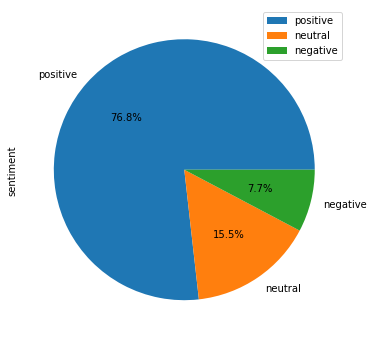

In [38]:
data1upd['sentiment'].value_counts().plot(kind='pie',figsize=(6,6),autopct='%1.1f%%',legend=True)